# Explore here

##**Imports**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.simplefilter('always', category=UserWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##**Global Variables**

In [3]:
val_split = 0.1
test_split = 0.1

##**Data Collection**

In [6]:
#Importing the dataframe from github and saving in data/raw folder.
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)
df.to_csv('../data/raw/AB_NYC_2019.csv')

In [7]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

##**Exploration and data cleaning**

In [8]:
#Shape of the dataframe: numbers of rows and columns
df.shape

(48895, 17)

In [9]:
#Check columns names, null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

In [10]:
#Preview of the firsts three rows of the dataframe
df.head(3)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [11]:
#Check for duplicates using ID column
df.duplicated("id").sum()

0

In [12]:
#Check for missing values
df.isna().sum()


Unnamed: 0                            0
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

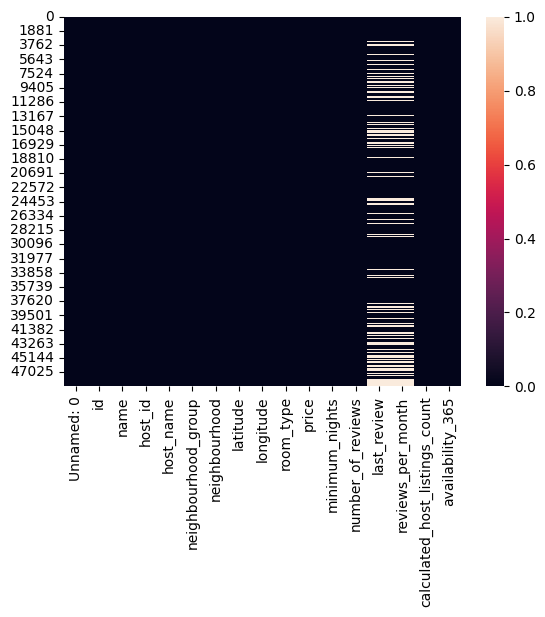

In [13]:
#Heatmap to visualise missing values
sns.heatmap(df.isnull())

In [14]:
#Delete unnecessary columns
df.drop(['name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [15]:
#Statistical characteristics of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48895.0,2.444700e+04,1.411492e+04,0.00,12223.50,24447.00,3.667050e+04,48894.0
id,48895.0,1.901714e+07,1.098311e+07,2539.00,9471945.00,19677284.00,2.915218e+07,36487245.0
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00,7822033.00,30793816.00,1.074344e+08,274321313.0
price,48895.0,1.527207e+02,2.401542e+02,0.00,69.00,106.00,1.750000e+02,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00,1.00,3.00,5.000000e+00,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00,1.00,5.00,2.400000e+01,629.0
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01,0.19,0.72,2.020000e+00,58.5
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00,1.00,1.00,2.000000e+00,327.0
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00,0.00,45.00,2.270000e+02,365.0


In [16]:
#Statistical characteristics of categorical variables
cat_variables = df.describe(include='object').T
cat_variables

,count,unique,top,freq
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


For categorical variables, the describe function shows the mode('top') and the frequency of the mode.

In [17]:
percentage_ng = round((cat_variables.loc['neighbourhood_group', 'freq']/len(df) *100), 2)
percentage_rt = round((cat_variables.loc['room_type', 'freq']/len(df) * 100), 2)
print(f"The neighbourhood group with more listings is {cat_variables.loc['neighbourhood_group', 'top']} with {percentage_ng}% of the listings.")
print(f"The most common room type is {cat_variables.loc['room_type', 'top']} representing {percentage_rt}% of the listings.")

The neighbourhood group with more listings is Manhattan with 44.3% of the listings.
The most common room type is Entire home/apt representing 51.97% of the listings.


##**Analysis of univariate variables**

###***Categorical variables***

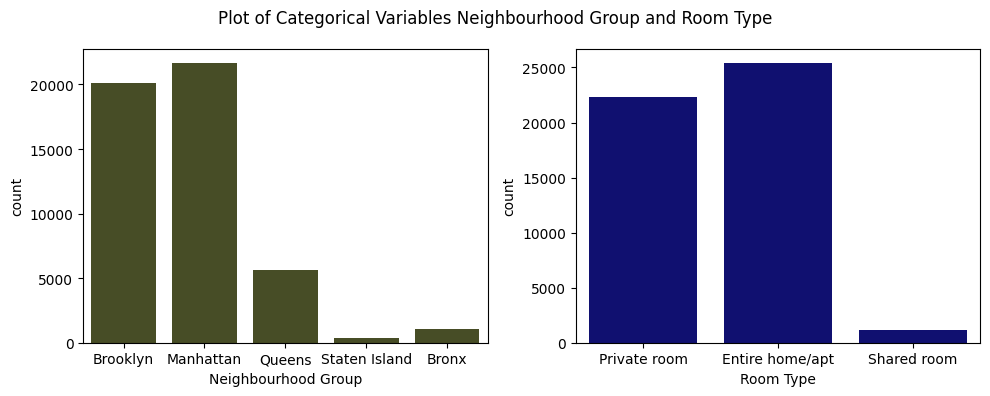

In [18]:
#Plot of neighbourhood_group and room_type
fig, axis = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(ax=axis[0], data=df, x="neighbourhood_group", color='#4B5320').set_xlabel('Neighbourhood Group')
sns.countplot(ax=axis[1], data=df, x="room_type", color='#000080').set_xlabel('Room Type')
fig.suptitle('Plot of Categorical Variables Neighbourhood Group and Room Type')
plt.tight_layout()
plt.show()

The majority of listings are in Brooklyn and Manhattan. As for the room type, most places are entire homes/apt or private rooms.

Since the neighbourhood column has 221 unique values, the plot below was built with the neighbourhoods that had a count of lisings above the median, in order to be easier to visualise.

In [19]:
print(f"The dataset contains {df.neighbourhood.nunique()} unique neighbourhoods.")
print(f"The median of the neighbourhood column count is {df.neighbourhood.value_counts().median()}.")

The dataset contains 221 unique neighbourhoods.
The median of the neighbourhood column count is 32.0.


In [20]:
filtered_neighbourhoods = df['neighbourhood'].value_counts()[df['neighbourhood'].value_counts() > df.neighbourhood.value_counts().median()]

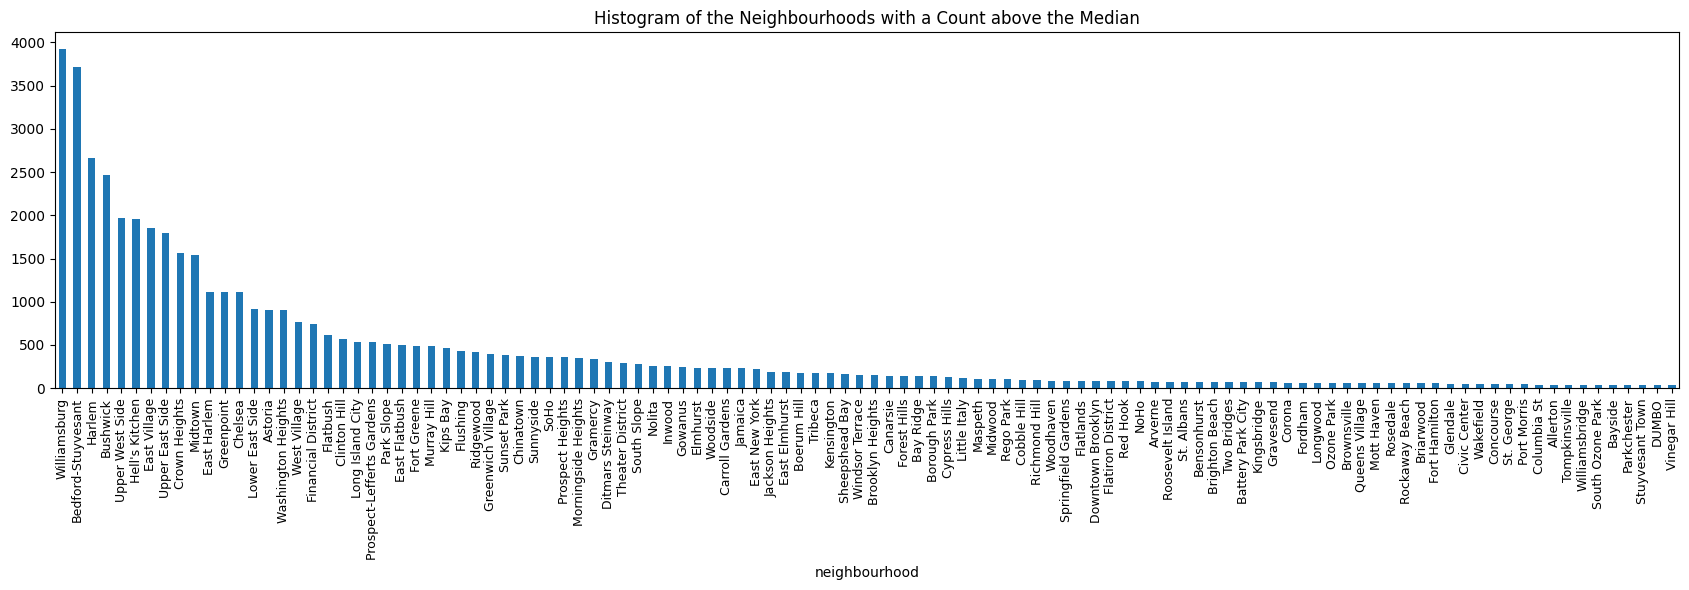

In [21]:
plt.figure(figsize=(17,6))
filtered_neighbourhoods.plot(kind='bar')
plt.xticks(fontsize=9)
plt.title('Histogram of the Neighbourhoods with a Count above the Median')
plt.tight_layout()
plt.show()

The neighbourhood with the most places for rental is Williamsburg, followed by Bedford-Stuyvesant, Harlem and Bushwick.

For the last review analysis, the column was casted to datetime format and the month and year were extracted to a new column.

In [22]:
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['lr_month_year'] = df['last_review'].dt.strftime('%Y-%m')

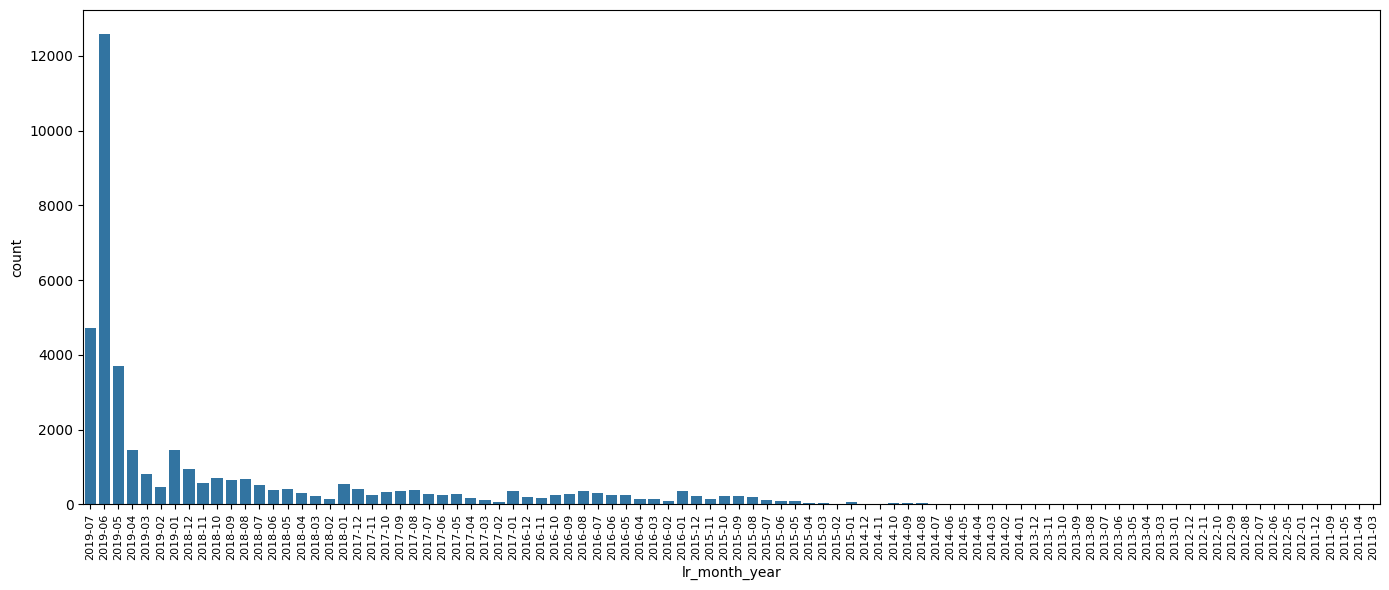

In [23]:
df.sort_values(by='last_review', ascending=False, inplace=True)
fig=plt.figure(figsize=(14,6))
sns.countplot(data=df, x='lr_month_year')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

###***Numerical variables***

In [24]:
num_variables = df.select_dtypes(include=np.number)
print(f"The numerical variables are: {num_variables.columns.values}.")

The numerical variables are: ['Unnamed: 0' 'id' 'host_id' 'price' 'minimum_nights' 'number_of_reviews'
 'reviews_per_month' 'calculated_host_listings_count' 'availability_365'].


In [25]:
min_nights = df['minimum_nights'].value_counts()[df['minimum_nights'].value_counts() > df['minimum_nights'].value_counts().median()]

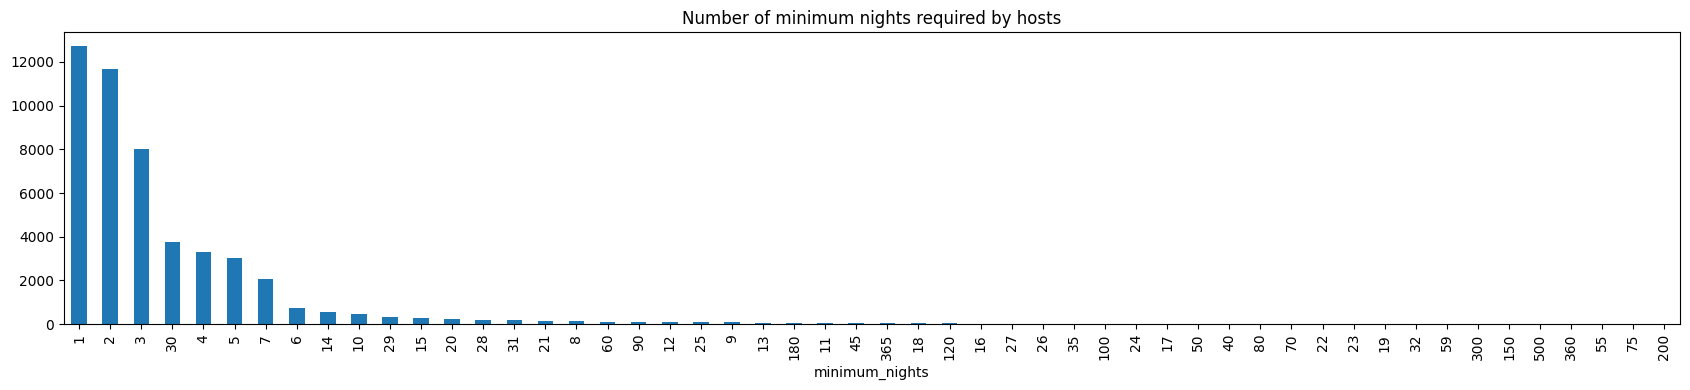

In [26]:
#Plots of minimum_nights
fig = plt.figure(figsize=(17,4))
min_nights.plot(kind='bar')
plt.title('Number of minimum nights required by hosts')
plt.tight_layout()
plt.xticks(fontsize=10)
plt.show()

Since there were values that seem to be outliers, the graph above was built considering the count of minimum nights above the median, almost half the places require a minimum stay of 1 or 2 nights.

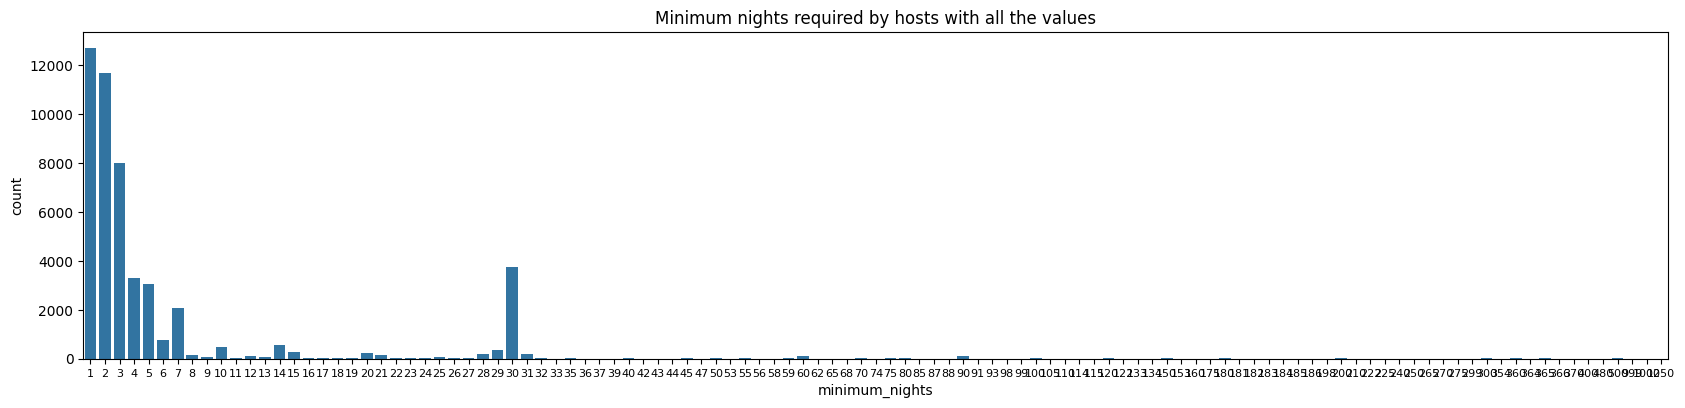

In [27]:
#Plot of the minimum_nights variable with all data
fig = plt.figure(figsize=(17,4))
sns.countplot(data=df, x='minimum_nights')
plt.tight_layout()
plt.title('Minimum nights required by hosts with all the values')
plt.xticks(fontsize=8)
plt.show()

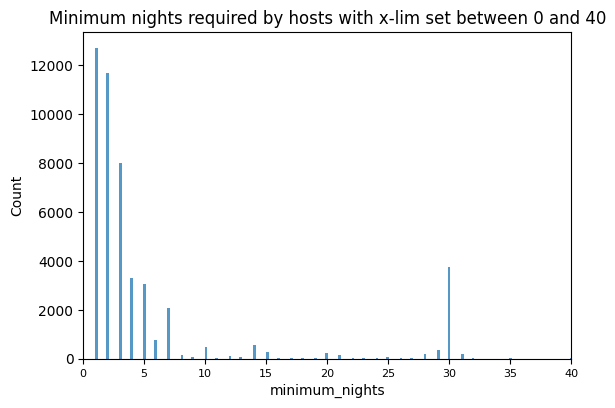

In [28]:
fig = plt.figure(figsize=(6,4))
sns.histplot(data=df, x='minimum_nights').set_xlim(0,40)
plt.tight_layout()
plt.title('Minimum nights required by hosts with x-lim set between 0 and 40')
plt.xticks(fontsize=8)
plt.show()

In [29]:
#Statistical characteristics of the price
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

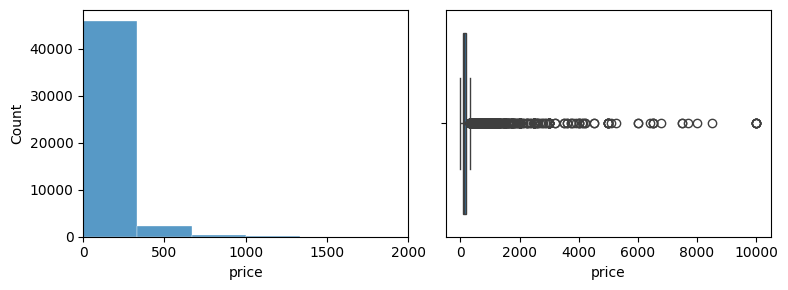

In [30]:
fig, axis=plt.subplots(1, 2, figsize=(8,3))
sns.histplot(ax=axis[0], data=df, x='price', bins=30, linewidth=0.25, edgecolor='white').set_xlim(0,2000)
sns.boxplot(ax=axis[1], data=df, x='price')
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

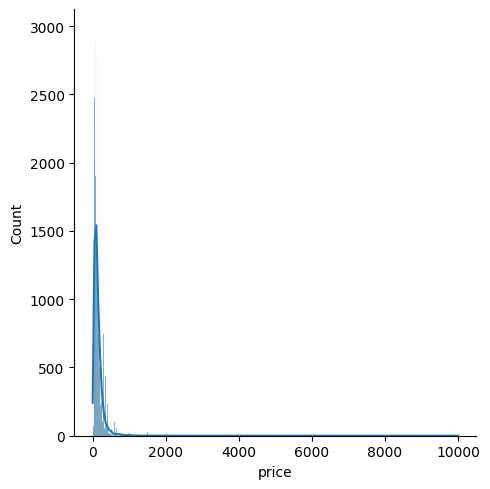

In [31]:
fig=plt.figure(figsize=(6,4))
sns.displot(data=df, x='price', kde=True)
plt.tight_layout()
plt.show()

Prices are skewed to the left and on the boxplot we can see that there are outliers.

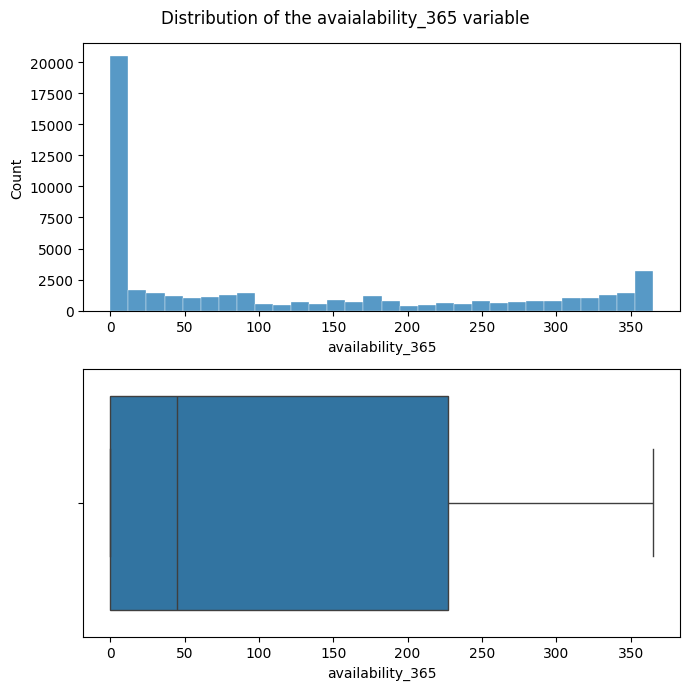

In [32]:
#avaialability_365
fig, axis = plt.subplots(2, 1, figsize=(7, 7))

sns.histplot(ax=axis[0], data=df, x='availability_365', linewidth=0.25, edgecolor='white')
sns.boxplot(ax=axis[1], data=df, x='availability_365')
fig.suptitle('Distribution of the avaialability_365 variable')
plt.tight_layout()
plt.show()


In [33]:
df.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [34]:
df[['number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_reviews,48895.0,23.274466,44.550582,0.00,1.00,5.00,24.00,629.0
reviews_per_month,38843.0,1.373221,1.680442,0.01,0.19,0.72,2.02,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00,1.00,1.00,2.00,327.0


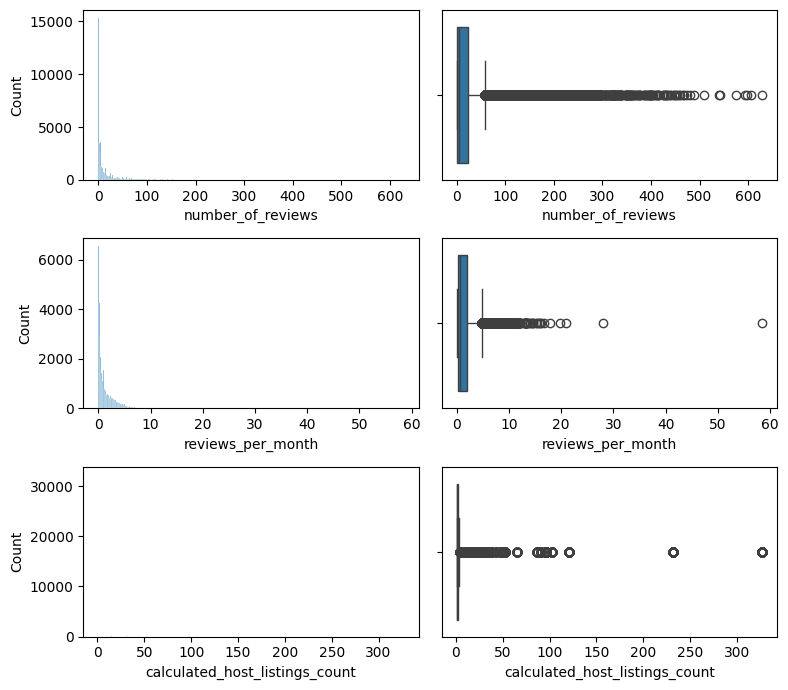

In [35]:
fig, axis=plt.subplots(3,2, figsize=(8,7))
sns.histplot(ax=axis[0,0], data=df, x='number_of_reviews', linewidth=0.25, edgecolor='white')
sns.boxplot(ax=axis[0,1], data=df, x='number_of_reviews')
sns.histplot(ax=axis[1,0], data=df, x='reviews_per_month', linewidth=0.25, edgecolor='white')
sns.boxplot(ax=axis[1,1], data=df, x='reviews_per_month')
sns.histplot(ax=axis[2,0], data=df, x='calculated_host_listings_count', linewidth=0.25, edgecolor='white')
sns.boxplot(ax=axis[2,1], data=df, x='calculated_host_listings_count')
plt.tight_layout()
plt.show()


##**Analysis of multivariate variables**

###***Price, Room Type and Neighbourhood Group***

/tmp/ipykernel_2506/3854078603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[0,0], x=df.room_type, y=df.price, palette='Set2').set_xlabel('Room Type')
/tmp/ipykernel_2506/3854078603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[0,1], x=df.neighbourhood_group, y=df.price, palette='Set3').set_xlabel('Neighbourhood Group')


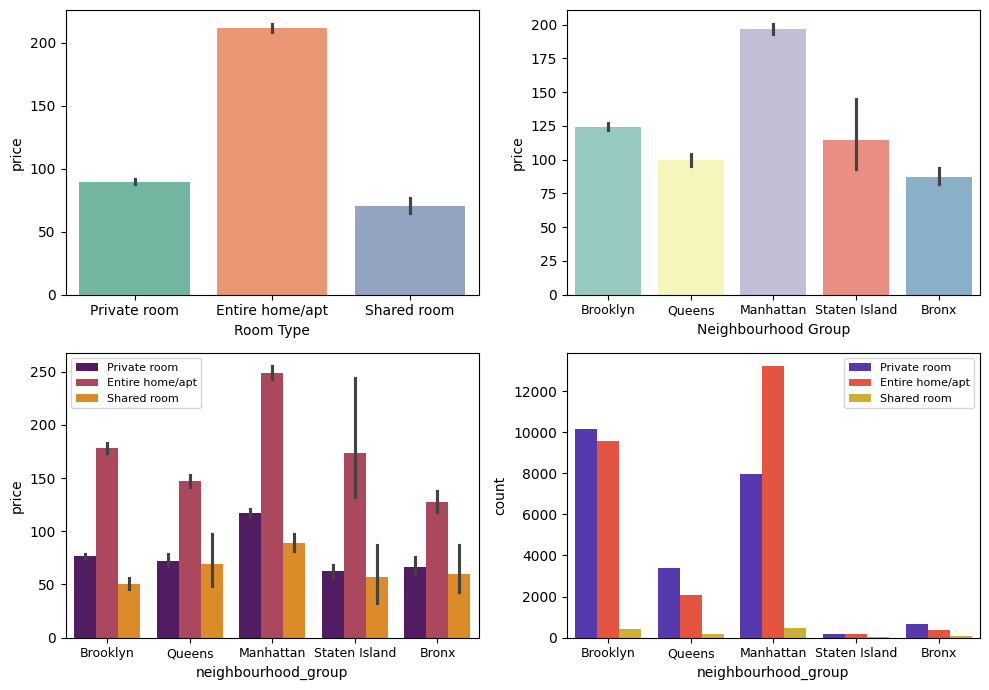

In [36]:
fig, axis = plt.subplots(2,2, figsize=(10,7))
sns.barplot(ax=axis[0,0], x=df.room_type, y=df.price, palette='Set2').set_xlabel('Room Type')
sns.barplot(ax=axis[0,1], x=df.neighbourhood_group, y=df.price, palette='Set3').set_xlabel('Neighbourhood Group')
sns.barplot(ax=axis[1,0],data=df, x="neighbourhood_group", y="price", hue="room_type", palette="inferno")
sns.countplot(ax=axis[1,1], x='neighbourhood_group', hue="room_type", data = df, palette = "CMRmap")
axis[1,0].legend(loc='best', fontsize=8)
axis[1,0].tick_params(axis='x', labelsize=9)
axis[0,1].tick_params(axis='x', labelsize=9)
axis[1,1].legend(loc='best', fontsize=8)
axis[1,1].tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()

The price is higher for entire apartments, followed by private rooms. The most expensive neighbourhood group is Manhattan. The majority of room types available in Manhattan are entire homes/apts. In Brooklyn there is a slight difference between the number of private rooms and entire home/apt.

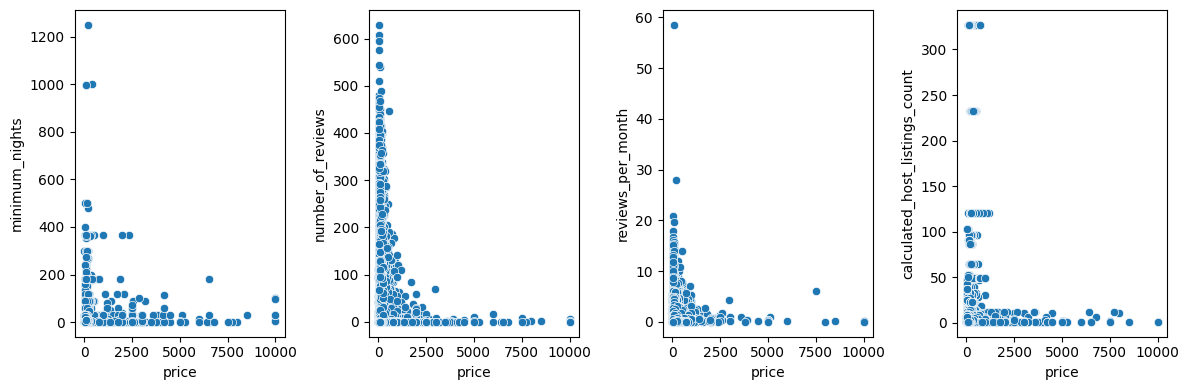

In [37]:
fig, axis = plt.subplots(1,4, figsize=(12,4))
sns.scatterplot(ax=axis[0], data=df, x='price', y='minimum_nights')
sns.scatterplot(ax=axis[1], data=df, x='price', y='number_of_reviews')
sns.scatterplot(ax=axis[2], data=df, x='price', y='reviews_per_month')
sns.scatterplot(ax=axis[3], data=df, x='price', y='calculated_host_listings_count')
plt.tight_layout()
plt.show()

###Correlation matrix

The variables neighbourhood_group and room_type we factorised to be included in the correlation matrix calculation.

In [38]:
df['neighbourhood_group_N'] = pd.factorize(df['neighbourhood_group'])[0]
df['room_type_N'] = pd.factorize(df['room_type'])[0]

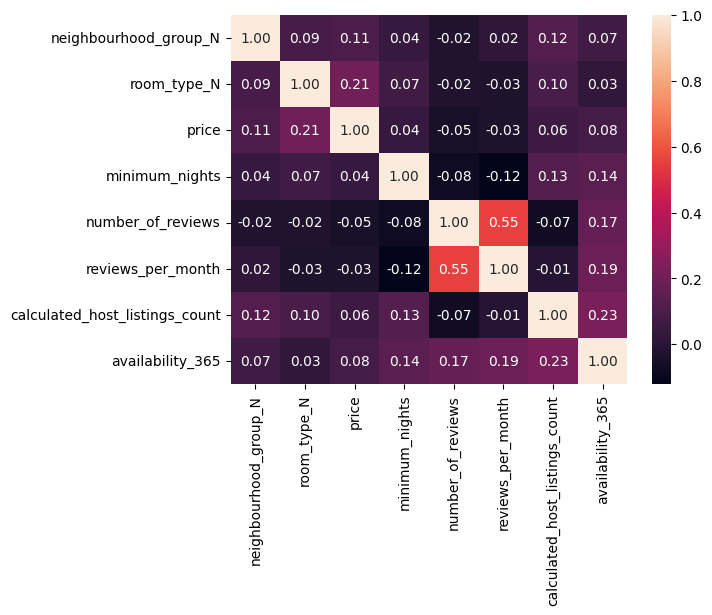

In [39]:
corr_matrix = df[['neighbourhood_group_N', 'room_type_N','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']].corr()
sns.heatmap(corr_matrix, annot=True,fmt = ".2f")
plt.show()

####Distplot of the numerical variables

0 0


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


0 1


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


0 2


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


0 3


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


1 0


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


1 1


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


1 2


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


1 3


/tmp/ipykernel_2506/940747152.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])


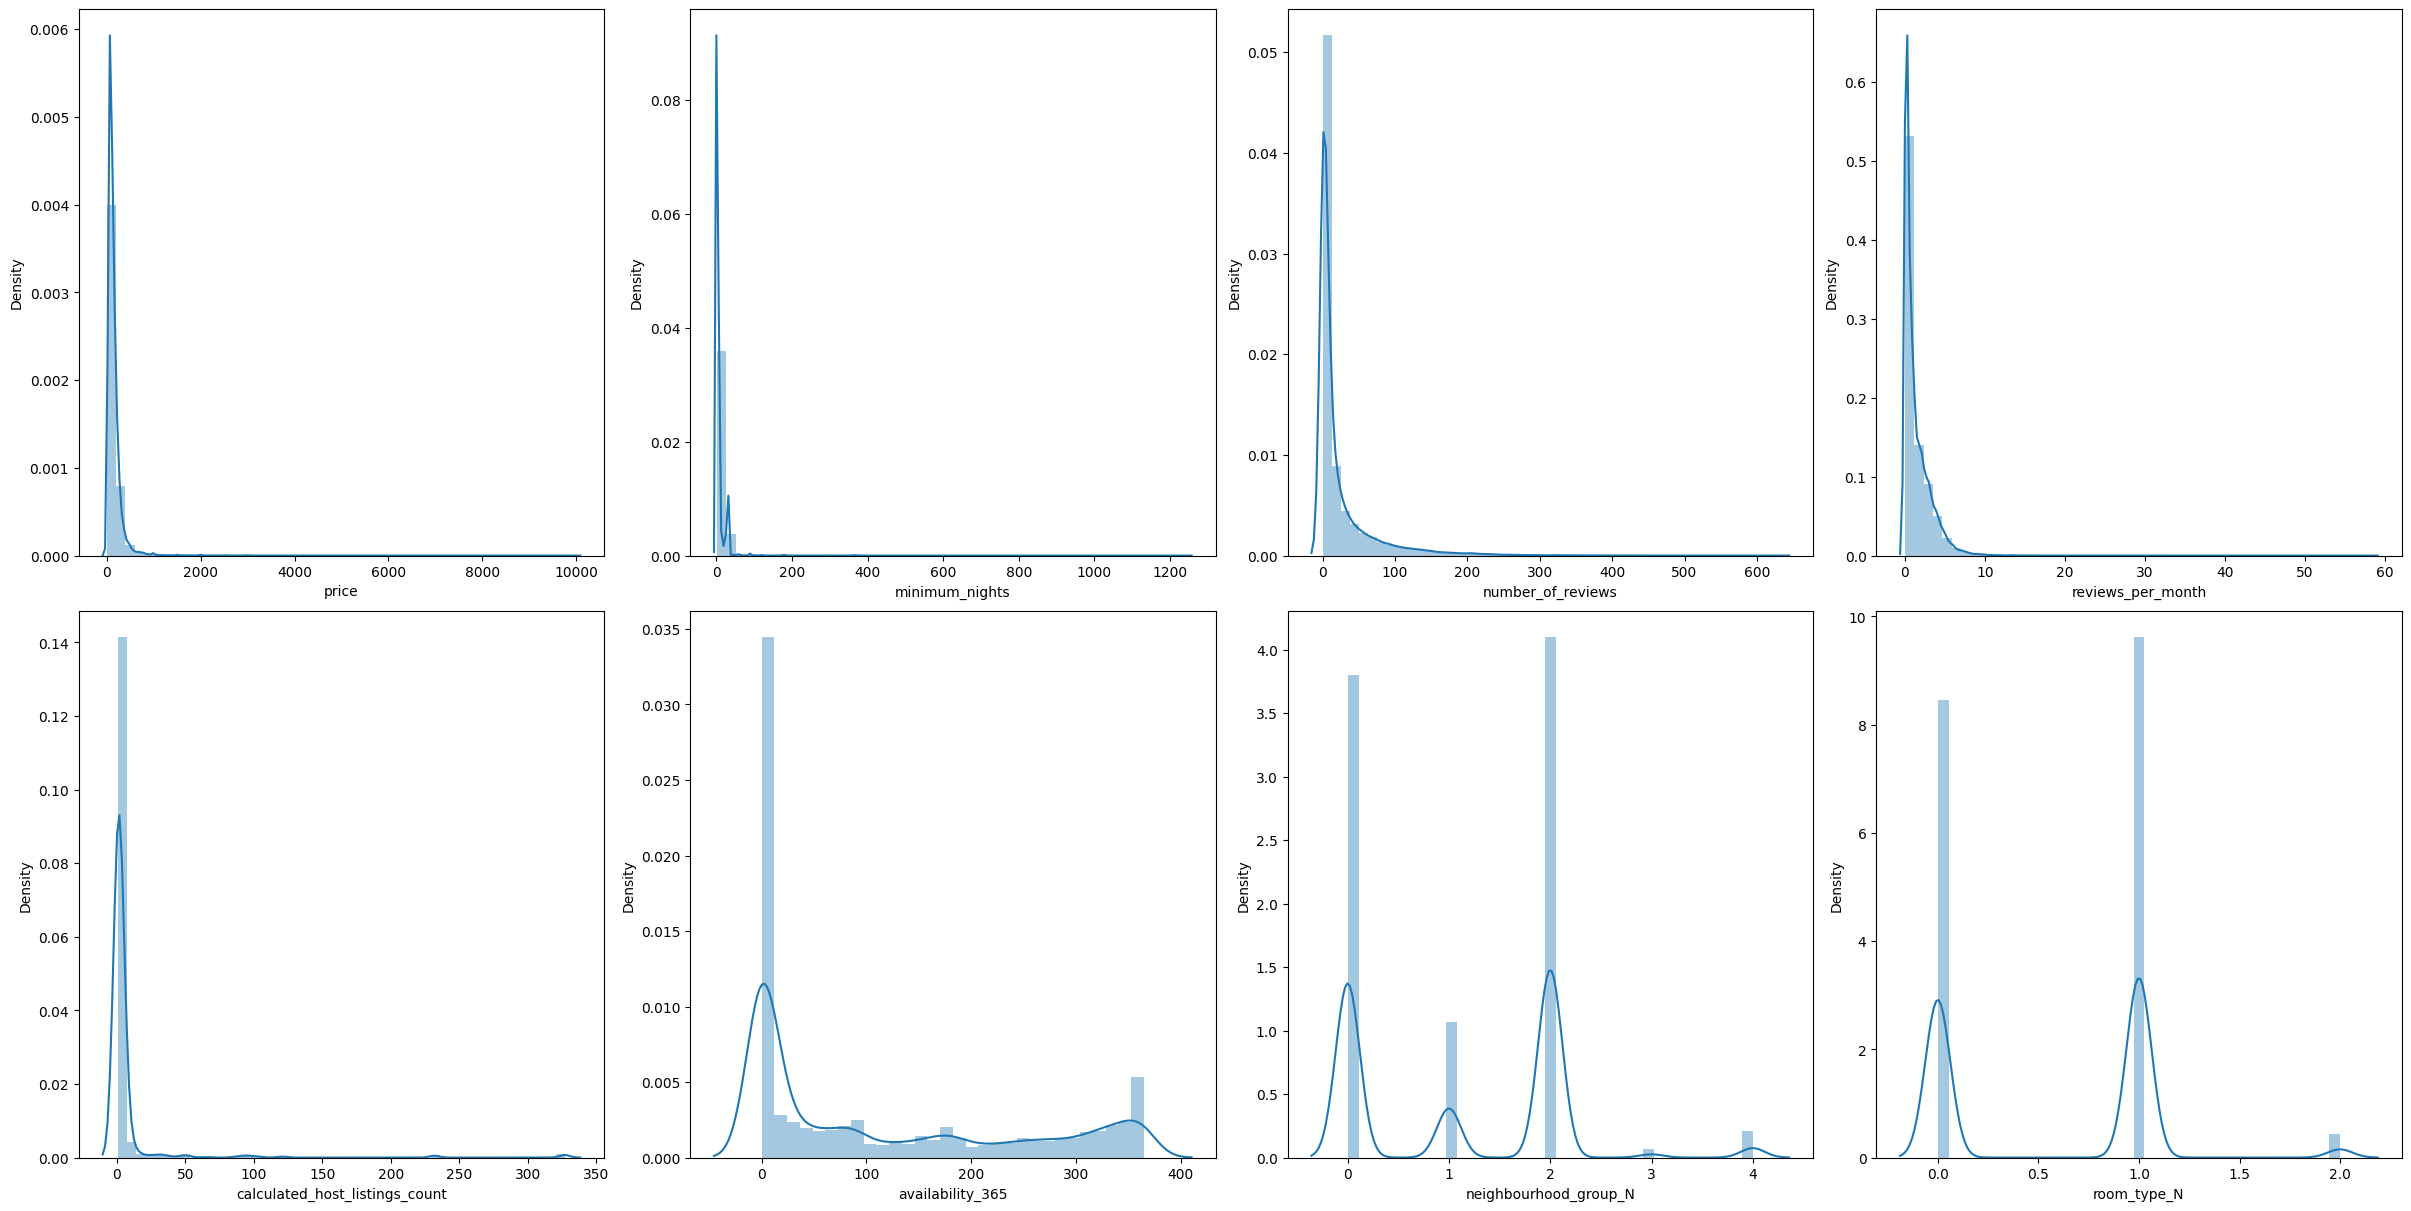

<Figure size 640x480 with 0 Axes>

In [40]:
variables = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_N', 'room_type_N']
#col_list = [i for i in df.columns if i not in variables]

#print(col_list)

num_plots = len(variables)
total_cols = 4
total_rows = len(variables)//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(6*total_cols, 6*total_rows), constrained_layout=True)

index = 0
for col in variables:

    row = index //total_cols
    pos = index % total_cols
    print(row, pos)
    #plot_ = sns.displot(y=df[col], ax=axs[row][pos])
    sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])
    index += 1
'''    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 25 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)'''
plt.show()
plt.tight_layout()

In the heatmap we can see that there is a correlation between price X room type and price X neighbourhood group.

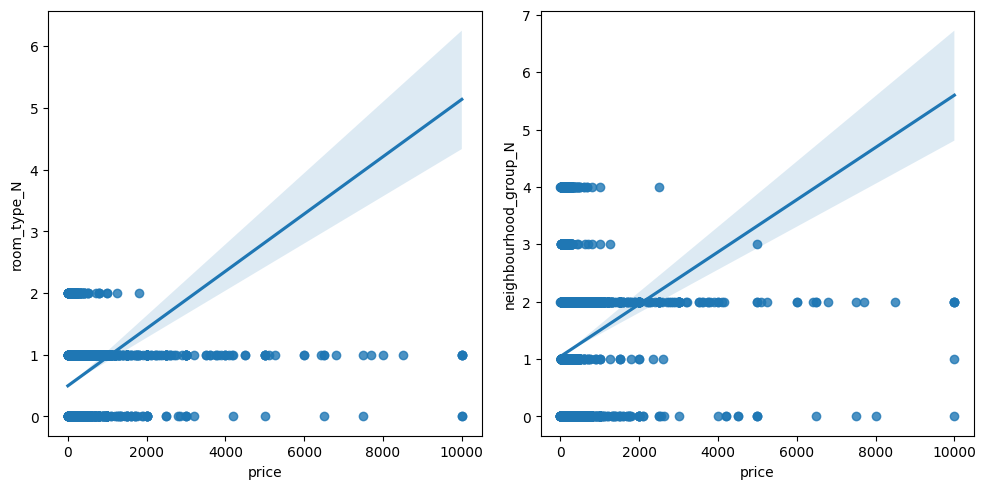

In [41]:
fig, axis = plt.subplots(figsize=(10,5), ncols=2)
sns.regplot(ax=axis[0], data = df, x = "price", y = "room_type_N")
sns.regplot(ax=axis[1], data = df, x = "price", y = "neighbourhood_group_N")
plt.tight_layout()
plt.show()

##***Feature scaling***

###Normalisation
The numerical columns that didn't have a gaussian distribution were normalised using the min-max scaler.

In [42]:
df_encoded = pd.DataFrame()
df_encoded['room_type'] = pd.factorize(df['room_type'])[0]
dummies = pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group')
df_encoded = pd.concat([df_encoded, dummies], axis=1)

In [43]:
#Normalisation
num_to_normalise = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler = MinMaxScaler()
norm_features = scaler.fit_transform(df[num_to_normalise])
df_encoded = pd.concat([df_encoded, pd.DataFrame(norm_features, index = df.index, columns = num_to_normalise)], axis=1)

In [44]:
df_encoded.head()

,room_type,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,False,True,False,False,False,0.0149,0.000000,0.014308,0.003419,0.015337,1.000000
1,1,False,False,True,False,False,0.0225,0.000000,0.071542,0.006326,0.003067,0.972603
2,1,False,False,True,False,False,0.0150,0.001601,0.000000,NaN,0.000000,1.000000
3,1,False,True,False,False,False,0.0089,0.000000,0.429253,0.079159,0.000000,0.531507
4,1,False,False,True,False,False,0.0080,0.007206,0.014308,0.001539,0.000000,0.000000


In [45]:
df_encoded.shape

(48895, 12)

###Data split

In [46]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_split, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = test_split, random_state = 42)

In [47]:
print('Variables:', X_train.shape, X_val.shape, X_test.shape)
print('Targets:', y_train.shape, y_val.shape, y_test.shape)

Variables: (39604, 11) (4890, 11) (4401, 11)
Targets: (39604,) (4890,) (4401,)


In [48]:
df_encoded.to_csv('../data/processed/AB_NYC_2019_processed.csv')